In [1]:
# Importing the required libraries for data analysis and visualization
import pandas as pd  # pandas is used for data manipulation and analysis
import numpy as np  # numpy is used for numerical computing, especially working with arrays
import matplotlib.pyplot as plt  # matplotlib is used for creating static, animated, and interactive plots
import matplotlib  # this is for customizing the overall plot settings
import seaborn as sns  # seaborn is built on top of matplotlib and provides a high-level interface for drawing attractive statistical graphics

# This command enables inline plotting within Jupyter notebooks (plots will appear directly in the notebook)
%matplotlib inline

# Setting the style of the Seaborn plots to 'darkgrid' for a grid background that is easy to read
sns.set_style('darkgrid')

# Customizing the font size of plot text (labels, titles, etc.)
matplotlib.rcParams['font.size'] = 14  # Setting the font size to 14 for all text in plots

# Customizing the default figure size for all plots (width x height in inches)
matplotlib.rcParams['figure.figsize'] = (9, 5)  # Making the plot wider and shorter

# Customizing the background color of the plot area
matplotlib.rcParams['figure.facecolor'] = 'D9DFC6'  # Setting a light beige color for the background

In [4]:
# Reading the CSV file into a pandas DataFrame from the specified path.
# The 'low_memory=False' option ensures pandas processes the entire dataset in one go, preventing issues with large files or mixed data types.
df = pd.read_csv('../data/International_sale_Report/Amazon_Sale_Report.csv', low_memory=False)

# Setting the pandas display option to show all columns in the DataFrame when displayed.
# By default, pandas might truncate the columns in large datasets, but this setting ensures you see every column.
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
# Selecting the 'Order ID' column from the DataFrame and filtering rows where the length of the 'Order ID' is not 19.
# The apply function is used to apply a lambda function to each value in the 'Order ID' column.
# The lambda function checks if the length of each 'Order ID' is not equal to 19 and returns True for those that don't match.
df['Order ID'][df['Order ID'].apply(lambda x: True if x.__len__() != 19 else False)]

Series([], Name: Order ID, dtype: object)

In [6]:
# Converting the 'Date' column from string (or object) format to a pandas datetime format.
# The pd.to_datetime function automatically detects the format of the date and converts it to a proper datetime object.
# This allows for easier manipulation and analysis of the date, such as extracting specific components (year, month, day) or performing date-based operations.
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\dlami\AppData\Local\Temp\ipykernel_12752\901864554.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
df['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [8]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [9]:
df['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [10]:
# Stripping leading and trailing whitespace characters (if any) from the column names in the DataFrame.
# The .str.strip() method is applied to all column names to remove extra spaces, ensuring that column names are clean and consistent.
df.columns = df.columns.str.strip()

In [11]:
df['Sales Channel'].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

In [12]:
df['ship-service-level'].unique()

array(['Standard', 'Expedited'], dtype=object)

In [13]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [14]:
df['Category'].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [15]:
df['Size'].unique()

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', '5XL',
       'Free'], dtype=object)

In [16]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


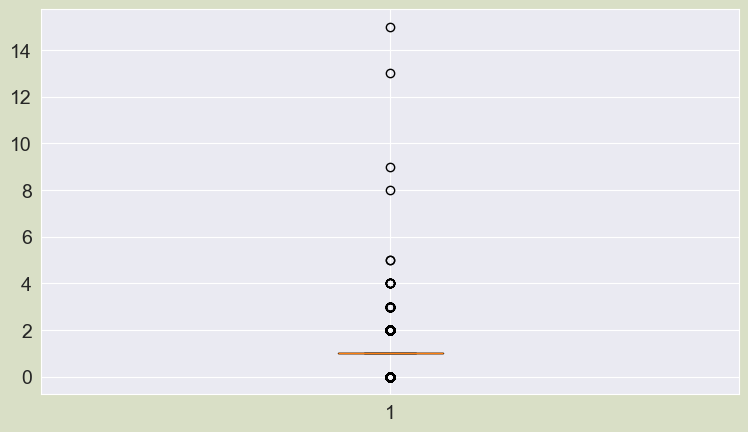

In [17]:
# Creating a box plot for the 'Qty' column in the DataFrame to visualize the distribution of quantities.
# A box plot helps identify the spread of the data, including the median, quartiles, and any potential outliers.
plt.boxplot(df['Qty'])

# Displaying the plot. This will render the box plot so you can visually analyze the data.
plt.show()

In [18]:
df['currency'].unique()

array(['INR', nan], dtype=object)

In [19]:
df.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN


In [20]:
# Generating descriptive statistics for the DataFrame.
# The .describe() method provides a summary of the central tendency, dispersion, and shape of the distribution of the data.
# It includes statistics like count, mean, standard deviation, min, max, and the 25th, 50th (median), and 75th percentiles.
df.describe()

,index,Date,Qty,Amount,ship-postal-code
count,128975.000000,128975,128975.000000,121180.000000,128942.000000
mean,64487.000000,2022-05-12 11:49:27.951928576,0.904431,648.561465,463966.236509
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,32243.500000,2022-04-20 00:00:00,1.000000,449.000000,382421.000000
50%,64487.000000,2022-05-10 00:00:00,1.000000,605.000000,500033.000000
75%,96730.500000,2022-06-04 00:00:00,1.000000,788.000000,600024.000000
max,128974.000000,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000
std,37232.019822,NaN,0.313354,281.211687,191476.764941


In [21]:
df['Amount'].idxmin()

212

In [22]:
df.iloc[210: 220]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
210,210,403-3561336-3563535,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET290,SET290-KR-DPT-M,Set,M,B09B5922WD,Shipped,1,INR,771.0,AHMEDABAD,Gujarat,380015.0,IN,NaN,False,NaN,NaN
211,211,402-9532672-5385917,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3405,JNE3405-KR-L,kurta,L,B081WSCKPQ,Shipped,1,INR,399.0,TIRUCHIRAPPALLI,TAMIL NADU,620001.0,IN,NaN,False,NaN,NaN
212,212,408-4547464-4180323,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3568,JNE3568-KR-XXL,kurta,XXL,B08KRYXSYH,Shipped,1,INR,0.0,BHUBANESWAR,ODISHA,752054.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
213,213,402-2211107-5096323,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-XXXL,Set,3XL,B0894Y3VBB,Shipped,1,INR,654.0,ALIGARH,UTTAR PRADESH,202001.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
214,214,403-9412025-7537140,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE2153,JNE2153-KR-278-A-S,kurta,S,B0794T8ZLN,Shipped,1,INR,424.0,KOCHI,KERALA,682006.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
215,215,403-5456917-5571511,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,JNE3861,JNE3861-DR-XL,Western Dress,XL,B09SDZ14KR,Cancelled,0,NaN,NaN,GHAZIABAD,UTTAR PRADESH,201014.0,IN,NaN,False,NaN,NaN
216,216,171-8452330-4756317,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3645,JNE3645-TP-N-XS,Top,XS,B08ZJ2CB3B,Shipped,1,INR,432.0,PUNE,MAHARASHTRA,412207.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
217,217,171-4350114-4299568,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3662,JNE3662-TP-XS,Top,XS,B0986ZVL6Y,Shipped,1,INR,399.0,PUNE,MAHARASHTRA,412207.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
218,218,405-8692900-3888310,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3440,JNE3440-KR-N-L,kurta,L,B081X7JHBC,Shipped,1,INR,399.0,Bangalore,KARNATAKA,560016.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
219,219,402-6750101-3923558,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET331,SET331-KR-NP-S,Set,S,B09NQ47F17,Shipped,1,INR,597.0,MALAPPURAM,KERALA,676517.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN


In [23]:
# Filtering the DataFrame to find rows where the 'Amount' column has values less than 1.
# The apply() function applies a lambda function to each value in the 'Amount' column.
# The lambda function checks if the value in 'Amount' is less than 1 and returns True for those that satisfy this condition.
df[df['Amount'].apply(lambda x: True if x < 1 else False)]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
212,212,408-4547464-4180323,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3568,JNE3568-KR-XXL,kurta,XXL,B08KRYXSYH,Shipped,1,INR,0.0,BHUBANESWAR,ODISHA,752054.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
374,374,408-5020509-5674715,2022-04-30,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,JNE3798,JNE3798-KR-M,Western Dress,M,B09SDXTRS9,Shipped,1,INR,0.0,NEW DELHI,DELHI,110096.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
385,385,408-3137526-3167563,2022-04-30,Shipped,Amazon,Amazon.in,Standard,JNE3405,JNE3405-KR-L,kurta,L,B081WSCKPQ,Shipped,1,INR,0.0,DARJEELING,WEST BENGAL,734101.0,IN,NaN,False,NaN,NaN
388,388,408-7971979-8745937,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0401,J0401-DR-XS,Western Dress,XS,B09SDXYWYN,Shipped,1,INR,0.0,LUDHIANA,PUNJAB,141001.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
392,392,408-0912805-7526753,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET365,SET365-KR-NP-L,Set,L,B09QJM9NDP,Shipped,1,INR,0.0,MUMBAI,MAHARASHTRA,400101.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128550,128550,408-6490796-0249925,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,SET374,SET374-KR-NP-L,Set,L,B09NDKQD88,Shipped,1,INR,0.0,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,False
128612,128612,408-9074023-7691550,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,BTM046,BTM046-PP-M,Bottom,M,B08L3SKGRS,Shipped,1,INR,0.0,INDORE,MADHYA PRADESH,452016.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
128685,128685,408-9473849-4953122,2022-06-01,Shipped,Amazon,Amazon.in,Standard,J0339,J0339-DR-M,Western Dress,M,B09831YHGV,Shipped,1,INR,0.0,MOHALI,PUNJAB,140301.0,IN,NaN,False,NaN,False
128804,128804,408-9579839-6574765,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET357,SET357-KR-NP-XL,Set,XL,B09Y3FNR5D,Shipped,1,INR,0.0,VADAKARA,KERALA,673101.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False


In [24]:
df.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN


In [25]:
df['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'Goa', 'MEGHALAYA', 'GOA',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN & NICOBAR ', 'Punjab', 'Rajshthan', 'Manipur',
       'rajasthan', 'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab',
       'New Delhi', 'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry',
       'delhi', 'RJ', 'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB',
       'APO', 'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [26]:
df['ship-country'].unique()

array(['IN', nan], dtype=object)

In [27]:
df['promotion-ids'].unique()

array([nan,
       'Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-CXNSLNBROFDW4,Amazon PLCC Free-Financing Universal Merchant AAT-R7GXNZWISTRFA,Amazon PLCC Free-Financing Universal Merchant AAT-WSJLDN3X7KEMO,Amazon PLCC Free-Financing Universal Merchant AAT-VL6FGQVGQVXUS,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-XVPICCHRWDCAI,Amazon PLCC Free-Financing Universal Merchant AAT-ETXQ3XXWMRXBG,Amazon PLCC Free-Fin

In [28]:
df['B2B'].unique()

array([False,  True])

In [29]:
df['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

In [30]:
df['Unnamed: 22'].unique()

array([nan, False], dtype=object)

In [31]:
df.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN


In [32]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [33]:
# Dropping unnecessary columns from the DataFrame.
# The 'index' and 'Unnamed: 22' columns are likely either redundant or irrelevant to the analysis.
# The 'inplace=True' argument ensures that the changes are applied directly to the original DataFrame without needing to assign it back.
df.drop(columns=['index', 'Unnamed: 22'], inplace=True)

In [34]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128975 non-null  object        
 1   Date                128975 non-null  datetime64[ns]
 2   Status              128975 non-null  object        
 3   Fulfilment          128975 non-null  object        
 4   Sales Channel       128975 non-null  object        
 5   ship-service-level  128975 non-null  object        
 6   Style               128975 non-null  object        
 7   SKU                 128975 non-null  object        
 8   Category            128975 non-null  object        
 9   Size                128975 non-null  object        
 10  ASIN                128975 non-null  object        
 11  Courier Status      122103 non-null  object        
 12  Qty                 128975 non-null  int64         
 13  currency            121180 no

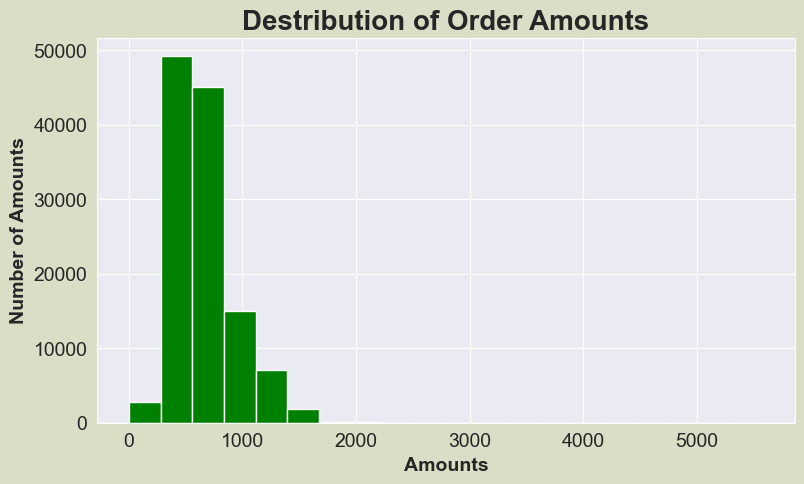

In [36]:
# Creating a histogram to visualize the distribution of the 'Amount' column.
# A histogram is useful for understanding the frequency of different ranges of values in the 'Amount' column.

# Plotting the histogram with 20 bins and setting the color to green.
# Bins are the intervals that the data is divided into for counting the frequencies.
plt.hist(x = df['Amount'], bins=20, color='green')
plt.title('Destribution of Order Amounts', fontweight='bold', fontsize=20)
plt.xlabel('Amounts', fontweight='bold')
plt.ylabel('Number of Amounts', fontweight='bold')
plt.show()

# Insight: Distribution of Order Amounts
## Overview
- This histogram visualizes the distribution of order amounts from an Amazon sales report. The x-axis represents the order amounts, while the y-axis shows the number of occurrences for each amount range.

## Key Observations
- The majority of order amounts are concentrated below 1000, with a sharp decline beyond this range.

- The highest frequency occurs in the lowest bins, indicating that most purchases are of smaller order values.

- There are very few high-value orders, suggesting either fewer expensive products or customer spending habits that favor lower-priced items.

## Analysis Purpose
### This distribution helps identify:
- Customer Spending Trends – Understanding the most common order sizes.
- Sales Strategy Insights – If most purchases are low-value, strategies like upselling or bundling could be useful.
- Potential Outliers – Any unexpected spikes or gaps could indicate data entry errors, bulk purchases, or unusual transactions.

In [37]:
# Grouping the data by 'Sales Channel' and calculating the average ('mean') 'Amount' for each group.
# This allows us to see the average sale amount for each sales channel.
amount_sale = df.groupby('Sales Channel')['Amount'].mean()

In [38]:
amount_sale

Sales Channel
Amazon.in     648.561465
Non-Amazon           NaN
Name: Amount, dtype: float64

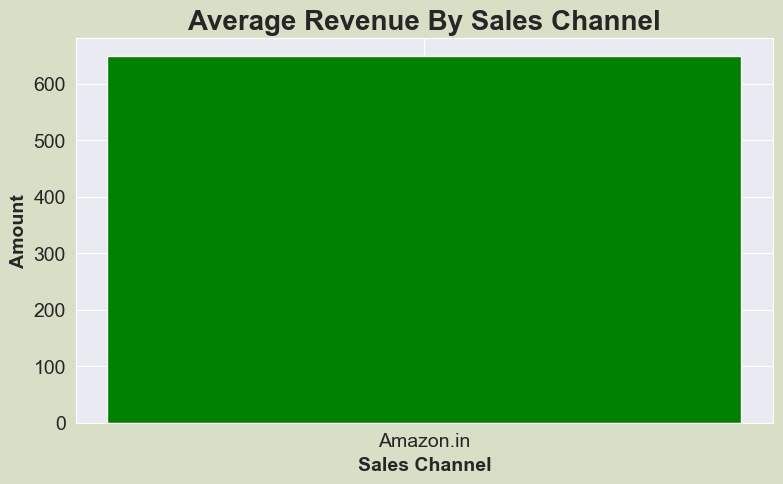

In [39]:
# Creating a bar chart to visualize the average revenue (amount) by sales channel.
# A bar chart is used to compare the average amounts across different sales channels.

# Plotting the bar chart with the sales channels on the x-axis and the average amounts on the y-axis.
# The 'amount_sale.index' contains the sales channel names, and 'amount_sale' contains the average amounts.
plt.bar(amount_sale.index, amount_sale, color='green')
plt.title('Average Revenue By Sales Channel', fontweight='bold', fontsize=20)
plt.xlabel('Sales Channel', fontweight='bold')
plt.ylabel('Amount', fontweight='bold')
plt.show()

# Insight: Average Revenue by Sales Channel
## Overview
- This bar chart illustrates the average revenue generated from different sales channels. The x-axis represents the sales channel, while the y-axis displays the average amount of revenue.

## Key Observations
- The only visible bar is for Amazon.in, with an average revenue of 648.56 per transaction.

- The Non-Amazon channel is missing (NaN), indicating either no recorded sales or data inconsistencies in that category.

- Since the Non-Amazon data is missing, comparisons between the two sales channels are not possible based on this chart.

## Analysis Purpose
### This chart is meant to analyze:
- Performance of Sales Channels – Understanding which platform generates more revenue.
- Data Integrity – The absence of data for Non-Amazon suggests either missing values or an actual lack of sales.
- Strategic Decision-Making – If Non-Amazon had sales, but they aren’t recorded, it might require a data review or correction before drawing insights.

In [40]:
# Grouping the data by 'Status' and counting the number of orders in each status category.
# The .size() function returns the number of occurrences (i.e., the number of orders) for each status type.
order_status = df.groupby('Status')['Order ID'].size()

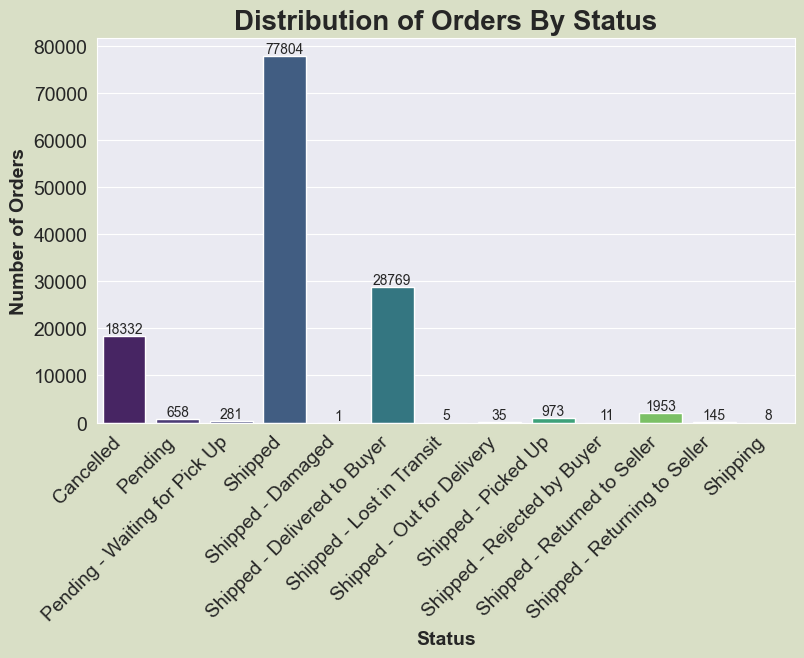

In [41]:
# Creating a bar plot using seaborn to visualize the distribution of orders by status.
# The 'order_status' series contains the number of orders per status category.
# The 'hue' argument is used to color the bars based on the 'Status', and the 'viridis' color palette is applied.
ax = sns.barplot(x=order_status.index, y=order_status, hue=order_status.index, palette='viridis')

# Adding labels on top of the bars to display the exact number of orders for each status.
# This helps make the chart more informative by showing the counts directly on the bars.
for index in range(len(order_status)):
    ax.bar_label(ax.containers[index], fontsize=10)
plt.title('Distribution of Orders By Status', fontweight='bold', fontsize=20)
plt.xlabel('Status', fontweight='bold')
plt.ylabel('Number of Orders', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

# Insight: Distribution of Orders by Status
## Overview
- This bar chart provides a breakdown of orders based on their current status. The x-axis represents different order statuses, while the y-axis shows the number of orders in each category.

## Key Observations
- The most frequent status is "Shipped" (77,804 orders), indicating a high volume of successful dispatches.

- "Shipped - Lost in Transit" (28,769 orders) is alarmingly high, which might indicate logistics issues or gaps in tracking.

- "Cancelled" (18,332 orders) is significantly higher than other problematic statuses, possibly due to customer dissatisfaction, payment failures, or stock issues.

- Very few orders fall under "Pending - Waiting for Pick Up" (658) and "Pending" (281), suggesting that most orders move forward quickly.

- Rare statuses like "Shipped - Damaged" (1 order) and "Shipping" (8 orders) are negligible, implying that most shipments are handled well.

## Analysis Purpose
### This chart helps in:
- Identifying potential bottlenecks – The high number of lost-in-transit orders might require logistics improvements.
- Assessing customer behavior – A high cancellation rate suggests the need for better inventory management or order fulfillment improvements.
- Tracking order fulfillment efficiency – The majority of orders being shipped is a positive indicator of a smooth sales process.

In [42]:
# Grouping the data by 'ship-country' and calculating the average ('mean') 'Amount' for each country.
# This gives us the average order amount for each shipping country.
country_amount = df.groupby('ship-country')['Amount'].mean()
country_amount

ship-country
IN    648.573305
Name: Amount, dtype: float64

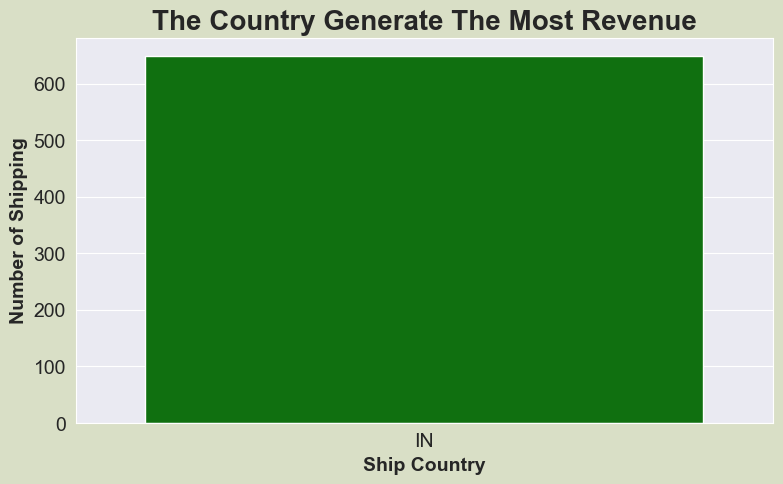

In [43]:
# Creating a bar plot using seaborn to visualize the average revenue by shipping country.
# The x-axis represents the shipping countries, and the y-axis represents the average revenue (Amount) for each country.

# Plotting the bar chart with green bars.
# 'country_amount.index' contains the country names, and 'country_amount' contains the average revenue for each country.
sns.barplot(x=country_amount.index, y=country_amount, color='green')
plt.title('The Country Generate The Most Revenue', fontweight='bold', fontsize=20)
plt.xlabel('Ship Country', fontweight='bold')
plt.ylabel('Number of Shipping', fontweight='bold')
plt.show()

# Insight: Shipment Revenue by Country 
## Overview 
- This data point reflects shipment revenue attributed to India ("IN"). The single figure suggests a detailed numerical breakdown or focus on the most significant contributor.

## Key Observations

- India's significant contribution: With a shipment revenue of 648.573305, India likely plays a dominant role in the overall distribution or performance of shipments.

- Potential growth opportunity: The prominent figure hints at either strong demand or a high-value market. Expansion efforts here might yield valuable returns.

- Dependency or risk: Heavily skewed revenue (if others are much lower) toward one country could introduce financial risk, emphasizing the need for diversification.

## Analysis Purpose This insight helps in:

- Optimizing market strategies: Leverage India's market strength while maintaining balance elsewhere.

- Identifying revenue streams: Deep dive into specific products or services driving this figure to replicate success in other regions.

- Assessing logistic efficiency: Ensure India-bound shipments are managed smoothly to sustain performance.

In [44]:
df['Qty'].unique()

array([ 0,  1,  2, 15,  3,  9, 13,  5,  4,  8])

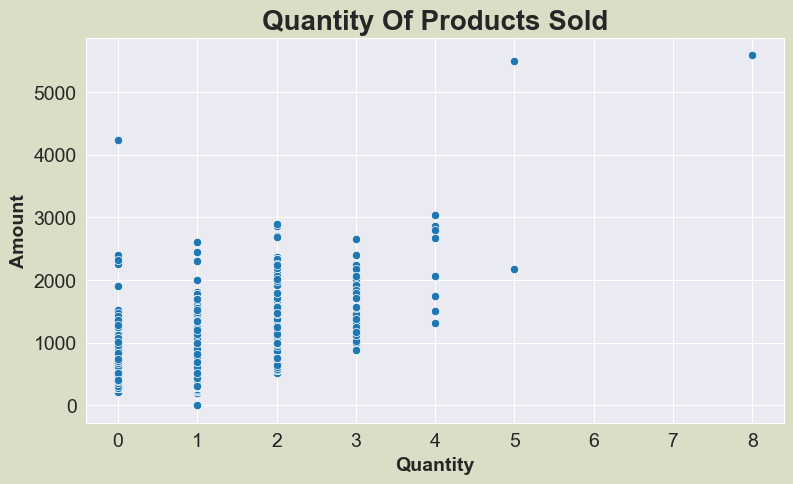

In [45]:
# Creating a scatter plot to visualize the relationship between quantity of products sold ('Qty') and the sale amount ('Amount').
# The scatter plot will show how the quantity of items correlates with the revenue (Amount).

# Plotting the scatter plot with 'Qty' on the x-axis and 'Amount' on the y-axis.
sns.scatterplot(x=df['Qty'], y=df['Amount'])
plt.title('Quantity Of Products Sold', fontsize=20, fontweight='bold')
plt.xlabel('Quantity', fontweight='bold')
plt.ylabel('Amount', fontweight='bold')
plt.show()

# Insight: Relationship Between Quantity Sold and Amount Spent 
## Overview
- This scatter plot examines how the amount spent correlates with the quantity of products sold.
- The x-axis represents the quantity of products sold (ranging from 0 to 8), while the y-axis depicts the amount spent (ranging from 0 to 6000).
- Each point reflects a specific data entry, showing how spending varies with quantity.

## Key Observations

### Diverse Spending Patterns for Low Quantities:

- For quantities between 0 and 4, there is a wide variation in the amount spent.

- Amounts range from 0 to approximately 4500 for quantity 0 and taper down for quantities 1 to 4.

- Reduced Data Points for Higher Quantities:

- Quantities of 5 and above show fewer data points, with amounts clustering between 3000 and 6000.

- This suggests that higher spending is more consistent at these quantities.

## Possible Outliers:

- There are instances where a low quantity (like 0) corresponds to a high amount spent, which might indicate data errors or exceptional transactions.

### Trend Indication:

- Higher quantities generally align with higher amounts spent, but the relationship does not appear strictly linear.

### Analysis Purpose This chart helps in:

- Identifying Spending Behavior: Analyze why some low quantities correspond to high spending and whether these are errors or special cases.

- Enhancing Sales Strategies: Higher amounts spent at smaller quantities could highlight premium products or services worth promoting.

- Understanding High-Quantity Purchases: Reduced variation at higher quantities may suggest bundled pricing or bulk-buying behavior.

In [46]:
# Grouping the data by 'promotion-ids' and calculating the average ('mean') 'Amount' for each promotion.
# This gives us the average revenue generated by each promotion.
promotion_effectiveness = df.groupby('promotion-ids')['Amount'].mean()

In [47]:
import textwrap

# Sorting the 'promotion_effectiveness' values in descending order and selecting the top 5 promotions.
# This helps us focus on the top-performing promotions in terms of average revenue.
promotion_effectiveness = promotion_effectiveness.sort_values(ascending=False).head(5)

# Wrapping the promotion labels to ensure they fit within a specific width (140 characters per line).
# This is helpful when the promotion IDs are long and may overlap or be hard to read on the plot.
wrapped_labels = ["\n".join(textwrap.wrap(label, width=140)) for label in promotion_effectiveness.index]

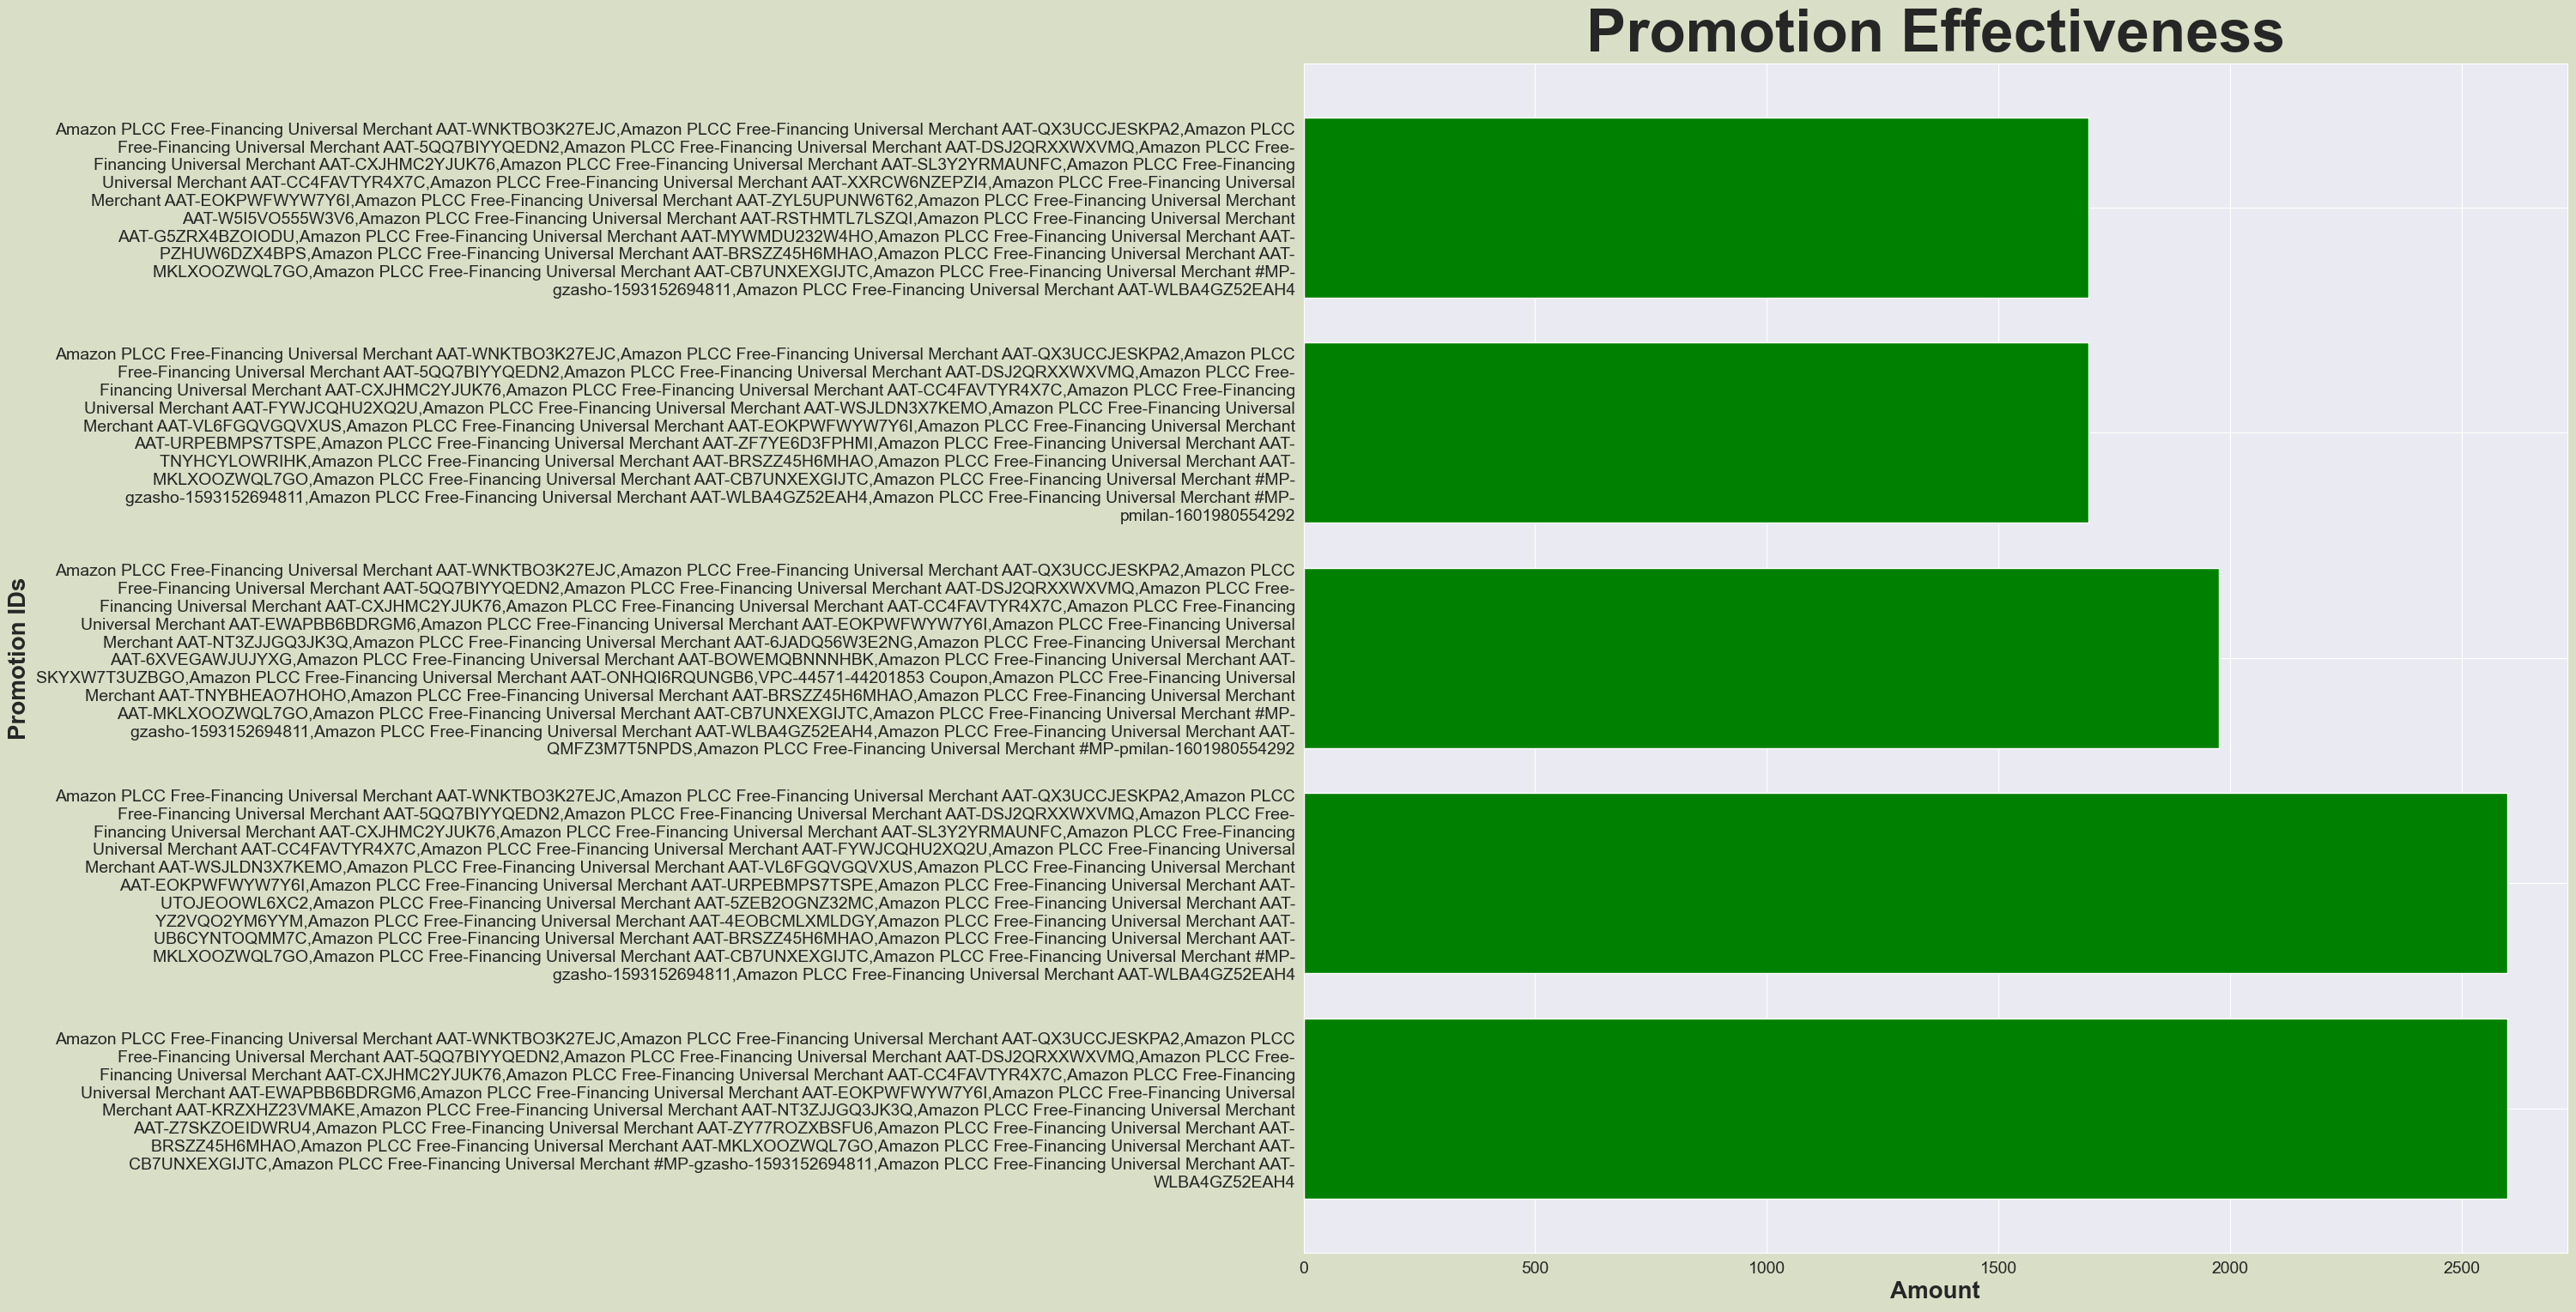

In [48]:
# Creating a horizontal bar plot to visualize the effectiveness of the top 5 promotions.
# The x-axis represents the average revenue (Amount), and the y-axis represents the promotion IDs.

# Setting the figure size to 19 by 18 inches to ensure the plot is large enough to display the labels clearly.
plt.figure(figsize=(19, 18))
plt.barh(wrapped_labels, promotion_effectiveness, color='green')

plt.title('Promotion Effectiveness', fontsize=50, fontweight='bold')
plt.xlabel('Amount', fontweight='bold', fontsize=20)
plt.ylabel('Promotion IDs', fontweight='bold', fontsize=20)
plt.show()

# Insight: Spending Performance on Top 5 Promotion IDs 
## Overview 
- The horizontal bar chart evaluates the relationship between the amount spent and the quantity sold, focusing on the top 5 promotion IDs.
- It highlights the variability in spending tied to these promotions.

## Key Observations

### Promotion Dominance:

- Two promotions ("AAT-CK4FATVYR4X7Q" and "AAT-EKOPFWVWTY76") lead with the highest spending, approximately 2500 each. This suggests these promotions drive significant investment or customer purchases.

## Performance Diversity:

### Spending varies among the remaining promotions:

- "AAT-CXJHMZJYUK76" sees about 2000.

- "AAT-SQOB7YBYQEDN2" captures around 1500.

- "AAT-Q3XJUCJESKPA2" trails with 1000.

### Potential Insights for Strategy:

- Promotions with higher spending might correspond to high engagement or successful marketing tactics.

- Lower spending on "AAT-Q3XJUCJESKPA2" could reflect less effective outreach or less customer interest.

## Opportunity for Analysis:

- Investigating what sets the top-performing promotions apart could provide useful strategies for underperforming ones.

### Analysis Purpose This insight helps in:

- Optimizing Marketing Strategies: Understand why certain promotions succeed to replicate their elements.

- Resource Allocation: Direct resources effectively toward promotions with high ROI.

- Customer Behavior Analysis: Examine why certain promotions appeal more to customers.

In [49]:
# Grouping the data by the 'B2B' column and calculating the average ('mean') 'Amount' for each B2B category.
# This will give us the average revenue (Amount) for both B2B (Business-to-Business) and non-B2B transactions.
b2b_avg = df.groupby('B2B')['Amount'].mean()

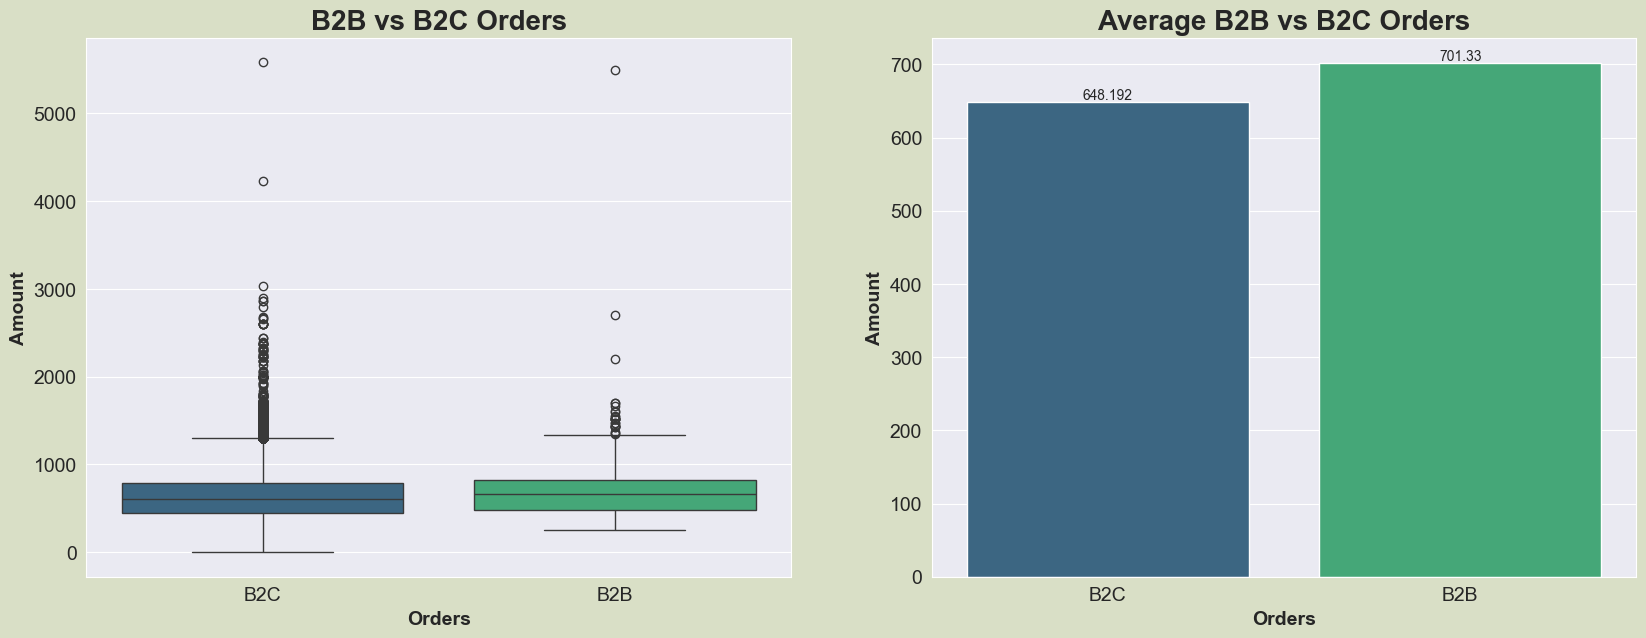

In [50]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)

# Creating a boxplot to visualize the distribution of the 'Amount' for B2B vs B2C orders.
# 'hue=df['B2B']' adds color differentiation for B2B and non-B2B (B2C) categories.
# 'palette='viridis'' sets the color palette for the boxplot.
# 'legend=False' hides the legend for better clarity.
sns.boxplot(x=df['B2B'], y=df['Amount'], hue=df['B2B'], palette='viridis', legend=False)
new_labels = ['B2C', 'B2B']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)
plt.title('B2B vs B2C Orders', fontweight='bold', fontsize=20)
plt.xlabel('Orders', fontweight='bold')
plt.ylabel('Amount', fontweight='bold')

ax = plt.subplot(1, 2, 2)

# Creating a barplot to compare the average revenue ('Amount') between B2C and B2B orders.
# 'hue=b2b_avg.index' differentiates the bars by 'B2C' and 'B2B'.
sns.barplot(x=b2b_avg.index, y=b2b_avg, hue=b2b_avg.index, palette='viridis', legend=False)
new_labels = ['B2C', 'B2B']

for index in range(len(new_labels)):
    try:
        ax.bar_label(ax.containers[index], fontsize=10)
    except:
        pass

plt.xticks(ticks=range(len(new_labels)), labels=new_labels)
plt.title('Average B2B vs B2C Orders', fontsize=20, fontweight='bold')
plt.xlabel('Orders', fontweight='bold')
plt.ylabel('Amount', fontweight='bold')
plt.show()


# Insight: Performance Comparison Between B2B and B2C in Order Amounts

## Overview The analysis includes two graphs:
- A box plot showing the distribution of order amounts for B2B and B2C.
- A bar chart highlighting the average order amounts for B2B and B2C.

## Key Observations

- Box Plot – Explicit Distribution:

### B2C Orders:

- Median order amount is approximately 500, with a broader range (interquartile range from 250 to 1000).

- Several outliers above 2000, one even surpassing 5000, indicating occasional high-value B2C transactions.

### B2B Orders:

- Median order amount is higher at around 700, with a narrower range (interquartile range from 400 to 1000).

- Fewer outliers above 2000, suggesting more consistent order amounts in B2B compared to B2C.

### Bar Chart – Averages:

- B2C Average: 648.192

- B2B Average: 701.33

- B2B orders have a slightly higher average amount compared to B2C, showcasing greater value per transaction in the business segment.

## Analysis Purpose These graphs provide valuable insights for:

### Targeted Strategies:
- Focus efforts on optimizing the consistency of B2C transactions to reduce variability and improve median values.
- Explore avenues to further enhance the higher-value transactions observed in B2B.

### Revenue Enhancement:
- Leverage the steadiness of B2B transactions to forecast revenue more accurately.
- Address factors driving outliers in B2C to create opportunities for similar transactions.

### Efficiency Improvements:
- For B2C, prioritize strategies to minimize inefficiencies linked to lower-value transactions and capitalize on outlier behaviors.
- For B2B, ensure that the slightly higher average amount remains consistent by maintaining quality partnerships and supply chains.